## Import Module

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

#EDA

##Import Data


In [ ]:
dv = pd.read_csv("09_DeteksiVirus.csv")

print("Data has size:", dv.shape)
dv.head()

FileNotFoundError: ignored

## Visualisasi

In [ ]:
dv

In [ ]:
dv.info()

In [ ]:
dv.describe()

In [ ]:
#Melihat adanya outliers
dv.boxplot(figsize=(20,3))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(dv.corr(), cmap="YlGnBu", annot=True)

### **1a Mencari Korelasi Platform dengan Keaslian OS**

In [ ]:
df_platform_correlation = dv.copy()
df_platform_correlation['Platform_encode_sementara'] = df_platform_correlation['Platform']
df_platform_correlation['Platform_encode_sementara'] = df_platform_correlation['Platform_encode_sementara'].replace(['windows10', 'windows7', 'windows8', 'windows2016'], [1,2,3,4])

In [ ]:
versi_awal = dv["Platform"].value_counts()
versi_encoded = df_platform_correlation['Platform_encode_sementara'].value_counts()
print("versi platform versi awal: "+str(versi_awal))
print("versi platform versi encode: "+str(versi_encoded))

In [ ]:
plt.title('Korelasi jumlah core processor terhadap keaslian OS')
plt.scatter(dv['IsOSGenuine'], dv['BanyakCoreProcessor'])

In [ ]:
# mencari korelasi "Platform" dengan software mesin
dv_platform_isOSGenuine = df_platform_correlation[['Platform', 'IsOSGenuine']]
dv_platform_isOSGenuine['IsOSGenuine'].unique()
dv_platform_isOSGenuine.drop(dv_platform_isOSGenuine[dv_platform_isOSGenuine['IsOSGenuine'] == "INVALID_LICENSE"].index, inplace = True)
dv_platform_isOSGenuine.drop(dv_platform_isOSGenuine[dv_platform_isOSGenuine['IsOSGenuine'] == "OFFLINE"].index, inplace = True)
dv_platform_isOSGenuine.drop(dv_platform_isOSGenuine[dv_platform_isOSGenuine['IsOSGenuine'] == "UNKNOWN"].index, inplace = True)
dv_platform_isOSGenuine

In [ ]:
dv_platform_isOSGenuine['Platform'].value_counts().plot(kind='bar', xlabel='Platform', ylabel='Genuine Frecuency', figsize=(10,5))
plt.xticks(rotation=0)
plt.show()

Di atas, kita bisa mendapatkan bahwa komputer dengan platform windows10 itu lebih banyak yang OS nya asli

### **1b Negara Produsen Antivirus dengan Ketahanan Virus**

In [ ]:
dv_negara = dv.copy()
dv_negara_infected = dv_negara[['IdNegaraPembuat','infected_proba']]

In [ ]:
dv_negara_infected_plot = dv_negara_infected.groupby('IdNegaraPembuat')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(50,20))
dv_negara_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_negara_infected_plot)

In [ ]:
dv_negara_infected['IdNegaraPembuat'].value_counts()

In [ ]:
dv_negara_infected['IdNegaraPembuat'].value_counts()[[134,72,13,212,200]]

In [ ]:
dv_negara_infected['IdNegaraPembuat'].value_counts()[[29,107,43,171,141]]

### **1c Perbedaan ISGamer**

In [ ]:
dv_gamer = dv.copy()
dv_gamer_ram = dv_gamer[['IsGamer','KapasitasRAM']]

In [ ]:
dv_gamer_ram_plot = dv_gamer_ram.groupby('IsGamer')['KapasitasRAM'].mean()

In [ ]:
plt.figure(figsize=(10,8))
dv_gamer_ram_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_gamer_ram_plot)

Komputer gaming memiliki rata-rata kapasitas RAM yang lebih besar

In [ ]:
dv_gamer_BuildOS = dv_gamer[['IsGamer','BuildOS']]

In [ ]:
dv_gamer_BuildOS_plot = dv_gamer_BuildOS.groupby('IsGamer')['BuildOS'].mean()

In [ ]:
plt.figure(figsize=(10,8))
dv_gamer_BuildOS_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_gamer_BuildOS_plot)

Komputer gaming memiliki rata-rata Build OS yang lebih besar

In [ ]:
dv_gaming = dv.copy()
dv_gaming_infected = dv_gaming[['IsGamer','infected_proba']]

In [ ]:
dv_gaming_infected_plot = dv_gaming_infected.groupby('IsGamer')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,8))
dv_gaming_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_gaming_infected_plot)

### **1d Korelasi Software dengan Kemungkinan Terinfeksi Virus**

In [ ]:
dv_software = dv.copy()
dv_OsSuite_infected = dv_software[['OsSuite','infected_proba']]
dv_platform_infected = dv_software[['Platform','infected_proba']]
dv_BuildOS_infected = dv_software[['BuildOS','infected_proba']]

In [ ]:
dv_platform_infected_plot = dv_platform_infected.groupby('Platform')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,8))
dv_platform_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_platform_infected_plot)

In [ ]:
dv_BuildOS_infected_plot = dv_BuildOS_infected.groupby('BuildOS')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,8))
dv_BuildOS_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_BuildOS_infected_plot)

In [ ]:
dv_OsSuite_infected_plot = dv_OsSuite_infected.groupby('OsSuite')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,8))
dv_OsSuite_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_OsSuite_infected_plot)

In [ ]:
dv_hardware = dv[["IdNegaraPembuat","Processor","BanyakCoreProcessor","IdPembuatProcessor","KapasitasDiskMemory","TipeDiskUtama","KapasitasRAM","TipeChassis","UkuranDiagonalLayar","UkuranHorisontalLayar","UkuranVertikalLayar","TipeBateraiInternal","infected_proba"]]
# sns.heatmap(dvv.corr(method='pearson'), annot=True, fmt="0.2f")
# plt.title('Heatmap Correlation Matrix for FuelConsumptionCO2')

In [ ]:
dv_pembuatprocessor = dv_hardware[["IdPembuatProcessor","infected_proba"]]
dv_pembuatprocesor_infected_plot = dv_pembuatprocessor.groupby('IdPembuatProcessor')['infected_proba'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,8))
dv_pembuatprocesor_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_pembuatprocesor_infected_plot)

In [ ]:
dv_pembuatprocessor.loc[dv_pembuatprocessor['IdPembuatProcessor'] == 10]

In [ ]:
dv_pembuatprocessor = dv_hardware[["Processor","infected_proba"]]
dv_pembuatprocesor_infected_plot = dv_pembuatprocessor.groupby('Processor')['infected_proba'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,8))
dv_pembuatprocesor_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_pembuatprocesor_infected_plot)

In [ ]:
dv_pembuatprocessor.loc[dv_pembuatprocessor['Processor'] == "arm64"]

### **[tambahan] Mencari Korelasi ukuran horizontal layar dengan ukuran vertikal layar**

In [ ]:
plt.plot(dv['UkuranHorisontalLayar'], dv['UkuranVertikalLayar'])
plt.title('Apakah semakin besar ukuran horizontal layar, ukuran vertikalnya juga semakin besar ?')
plt.xlabel('Ukuran Horizontal')
plt.ylabel('Ukuran Vertikal')
plt.show()

Kemungkinan besar, apabila semakin besar ukuran layar horizontal maka akan semakin besar pula ukuran vertikalnya

### Negara lokasi mesin dengan ketahanan virus

In [ ]:
dv_software = dv.copy()
dv_OsSuite_infected = dv_software[['IdLokasiGeografisMesinSaatIni','infected_proba']]
dv_platform_infected = dv_software[['AutoUpdateSetting','infected_proba']]
dv_BuildOS_infected = dv_software[['IsSecureBootEnabled','infected_proba']]

In [ ]:
dv_platform_infected_plot = dv_OsSuite_infected.groupby('IdLokasiGeografisMesinSaatIni')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,8))
dv_platform_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_platform_infected_plot)

> ada banyak negara yang memiliki ketahanan virus rendah
seperi negara 188, 136, 145 dan lain sebagianya. sedangkan ada 3 negara dengan probabilitas terinfeksi terendah yaitu 164, 49, dan 41

In [ ]:
dv_lokasi=dv_software[["IdLokasiGeografisMesinSaatIni","infected_proba"]]

In [ ]:
dv_lokasi.loc[dv_lokasi['IdLokasiGeografisMesinSaatIni'].value_counts().loc[lambda x : x>1000]]

In [ ]:
dv_lokasi[['IdLokasiGeografisMesinSaatIni']].value_counts().loc[lambda x : x>1000]

In [ ]:
dv_platform_infected_plot = dv_lokasi.groupby('IdLokasiGeografisMesinSaatIni')['infected_proba'].mean().sort_values(ascending = False)
dv_platform_infected_plot

In [ ]:
dv_lokasi['team_count'] = dv_lokasi.groupby('IdLokasiGeografisMesinSaatIni')['infected_proba'].transform('count')

In [ ]:
dv_lokasi

5 negara produsen antivirus yang memiliki ketahanan paling baik terhadap virus adalah negara dengan id 200, 212, 13, 72, dan 134 (dari yang paling bagus). Sedangkan 5 negara produsen antivirus yang memiliki kerentanan atau kemungkinan terhadap serangan atau infeksi virus adalah negara dengan id 196, 193, 117, 186, dan 105 (dari yang paling buruk).

In [ ]:
dv_platform_infected_plot = dv_BuildOS_infected.groupby('IsSecureBootEnabled')['infected_proba'].mean().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,8))
dv_platform_infected_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(dv_platform_infected_plot)

#Pre Processing

## Duplicated Data

In [ ]:
dv_cleaned = dv.copy()

In [ ]:
dv_cleaned.duplicated(keep=False).sum()

In [ ]:
# dropping duplicate values
dv_cleaned = dv_cleaned.drop_duplicates()

dv_cleaned.duplicated(keep=False).sum()

## Outliers

In [ ]:
def outlier_counter(df):
  q1 = df.quantile(q = 0.25)
  q3 = df.quantile(q = 0.75)
  iqr = q3 - q1
  hasil = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()
  return hasil

In [ ]:
def outlier_to_median(df, column):
  # membuat outliers menjadi NaN Value
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  iqr = quartile3 - quartile1
  df.loc [df[column] < (quartile1 - 1.5 * iqr), column] = np.nan
  df.loc [df[column] > (quartile3 + 1.5 * iqr), column] = np.nan
  # mengisi bagian yang NaN aatau yang missing value dengan median
  df.fillna(df[column].median())
  # memeriksa apakah masih ada outliers atau tidak
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  recent_outlier = ((df[column] < (quartile1 - 1.5 * iqr)) | (df[column] > (quartile3 + 1.5 * iqr))).sum()
  print("outlier saat ini ada sebanyak",recent_outlier)

In [ ]:
def drop_outlier(df, column):
  # membuat outliers menjadi NaN Value
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  iqr = quartile3 - quartile1
  df.loc [df[column] < (quartile1 - 1.5 * iqr), column] = np.nan
  df.loc [df[column] > (quartile3 + 1.5 * iqr), column] = np.nan
  # menghapus outlier
  df.dropna()
  # memeriksa apakah masih ada outliers atau tidak
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  recent_outlier = ((df[column] < (quartile1 - 1.5 * iqr)) | (df[column] > (quartile3 + 1.5 * iqr))).sum()
  print("outlier saat ini ada sebanyak",recent_outlier)

In [ ]:
def outlier_to_upper_lower(df, column):
  # membuat outliers menjadi NaN Value
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  iqr = quartile3 - quartile1
  lower = quartile1 - 1.5 * iqr
  upper = quartile3 + 1.5 * iqr
  df.loc [df[column] < (quartile1 - 1.5 * iqr), column] = lower
  df.loc [df[column] > (quartile3 + 1.5 * iqr), column] = upper
  # memeriksa apakah masih ada outliers atau tidak
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  recent_outlier = ((df[column] < (quartile1 - 1.5 * iqr)) | (df[column] > (quartile3 + 1.5 * iqr))).sum()
  print("outlier saat ini ada sebanyak",recent_outlier)

In [ ]:
def outlier_info(df, column):
  q1 = df[column].quantile(q = 0.25)
  q3 = df[column].quantile(q = 0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  median = df[column].median()
  print("q1: "+str(q1))
  print("q3: "+str(q3))
  print("lower: "+str(lower))
  print("upper: "+str(upper))
  print("median: "+str(median))

In [ ]:
outlier_counter(dv_cleaned)

In [ ]:
dv_cleaned['IsGamer'].value_counts()

In [ ]:
dv_cleaned['IsTouchScreen'].value_counts()

> Untuk outlier IsGamer dan IsTouchScreen menurut kami tidak perlu ditangani karena sebenarnya valuenya hanya 2, yaitu benar (1) atau tidak (0)

In [ ]:
dv_cleaned['KapasitasDiskMemory'].value_counts()

In [ ]:
outlier_info(dv_cleaned, "KapasitasDiskMemory")

In [ ]:
dv_cleaned['BanyakCoreProcessor'].value_counts()

In [ ]:
outlier_info(dv_cleaned, "BanyakCoreProcessor")

> Untuk outlier BanyakCoreProcessor, kami menanganinnya dengan cara menjadikan upper apabila melewati upper limit atau menjadikan lower apabila melewati lower limit

In [ ]:
dv_cleaned["BanyakAntivirus"].value_counts()

In [ ]:
outlier_info(dv_cleaned, "BanyakAntivirus")

In [ ]:
dv_cleaned["RevisiBuildOS"].value_counts()

In [ ]:
outlier_info(dv_cleaned, "RevisiBuildOS")

In [ ]:
dv_cleaned["IdModelOEM"].value_counts()

In [ ]:
outlier_info(dv_cleaned, "IdModelOEM")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"BanyakCoreProcessor")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"RevisiBuildOS")

In [ ]:
dv_cleaned["RevisiBuildOS"].value_counts()

In [ ]:
outlier_info(dv_cleaned, "RevisiBuildOS")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"BanyakAntivirus")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"KapasitasDiskMemory")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"KapasitasRAM")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"KapasitasVolumeSistem")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"UkuranDiagonalLayar")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"UkuranHorisontalLayar")

In [ ]:
outlier_to_upper_lower(dv_cleaned,"UkuranVertikalLayar")

In [ ]:
outlier_counter(dv_cleaned)

In [ ]:
dv_cleaned

## Missing Value

In [ ]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(dv_cleaned)

In [ ]:
dv_cleaned.drop('IdDefaultBrowser', inplace=True, axis=1)

In [ ]:
cek_null(dv_cleaned)

In [ ]:
dv_cleaned["IdLokasiGeografisMesinSaatIni"].unique()

In [ ]:
dv_cleaned['IdLokasiGeografisMesinSaatIni'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdModelProcessor'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdOEM'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdModelOEM'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdVersiFirmware'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdPembuatFirmware'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned.drop('IdSettingAntivirus', inplace=True, axis=1)

In [ ]:
dv_cleaned.drop('IdOrganisasiPembuat', inplace=True, axis=1)

In [ ]:
dv_cleaned['IdKotaPembuat'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdPembuatProcessor'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['TipeBateraiInternal'] = dv_cleaned['TipeBateraiInternal'].fillna(dv_cleaned['TipeBateraiInternal'].mode()[0])

In [ ]:
dv_cleaned['SmartScreenSetting'] = dv_cleaned['SmartScreenSetting'].fillna(dv_cleaned['SmartScreenSetting'].mode()[0])

In [ ]:
dv_cleaned['BanyakAntivirus'] = dv_cleaned['BanyakAntivirus'].fillna(dv_cleaned['BanyakAntivirus'].median())

In [ ]:
dv_cleaned['UkuranDiagonalLayar'] = dv_cleaned['UkuranDiagonalLayar'].fillna(dv_cleaned['UkuranDiagonalLayar'].median())

In [ ]:
dv_cleaned['UkuranVertikalLayar'] = dv_cleaned['UkuranVertikalLayar'].fillna(dv_cleaned['UkuranVertikalLayar'].median())

In [ ]:
dv_cleaned['UkuranHorisontalLayar'] = dv_cleaned['UkuranHorisontalLayar'].fillna(dv_cleaned['UkuranHorisontalLayar'].median())

In [ ]:
dv_cleaned['TipeDiskUtama'] = dv_cleaned['TipeDiskUtama'].fillna(dv_cleaned['TipeDiskUtama'].mode()[0])

In [ ]:
dv_cleaned['KapasitasRAM'] = dv_cleaned['KapasitasRAM'].fillna(dv_cleaned['KapasitasRAM'].median())

In [ ]:
dv_cleaned['BanyakCoreProcessor'] = dv_cleaned['BanyakCoreProcessor'].fillna(dv_cleaned['BanyakCoreProcessor'].median())

In [ ]:
dv_cleaned['VersiInternetExplorer'] = dv_cleaned['VersiInternetExplorer'].fillna(dv_cleaned['VersiInternetExplorer'].median())

In [ ]:
dv_cleaned['IsGamer'] = dv_cleaned['IsGamer'].fillna(dv_cleaned['IsGamer'].median())

In [ ]:
dv_cleaned['KapasitasVolumeSistem'] = dv_cleaned['KapasitasVolumeSistem'].fillna(dv_cleaned['KapasitasVolumeSistem'].median())

In [ ]:
dv_cleaned['KapasitasDiskMemory'] = dv_cleaned['KapasitasDiskMemory'].fillna(dv_cleaned['KapasitasDiskMemory'].median())

In [ ]:
dv_cleaned['TipeChassis'] = dv_cleaned['TipeChassis'].fillna(dv_cleaned['TipeChassis'].mode()[0])

In [ ]:
cek_null(dv_cleaned)

In [ ]:
dv_cleaned.info()

In [ ]:
outlier_counter(dv_cleaned)

In [ ]:
outlier_to_upper_lower(dv_cleaned,"BanyakAntivirus")
outlier_to_upper_lower(dv_cleaned,"KapasitasDiskMemory")
outlier_to_upper_lower(dv_cleaned,"KapasitasVolumeSistem")
outlier_to_upper_lower(dv_cleaned,"UkuranDiagonalLayar")

In [ ]:
outlier_counter(dv_cleaned)

##Encode

In [ ]:
dv_cleaned.info()

### Platform Encoding

In [ ]:
dv_cleaned['Platform'].value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['Platform']])
dv_cleaned_platform = pd.DataFrame(encoder)

In [ ]:
dv_cleaned_platform.value_counts()

In [ ]:
dv_cleaned_platform.rename(columns = {0:'Windows 10', 1:'Windows 7', 2:'Windows 8', 3:'Windows 2016'}, inplace = True)

dv_cleaned_platform

In [ ]:
dv_cleaned = dv_cleaned.join(dv_cleaned_platform)
dv_cleaned

In [ ]:
dv_cleaned.drop('Platform', inplace=True, axis=1)
dv_cleaned

### Processor Encoding

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['Processor']])
dv_cleaned_processor = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_processor.value_counts())
print(dv_cleaned['Processor'].value_counts())

In [ ]:
dv_cleaned_processor.rename(columns = {0:'x64', 1:'x86', 2:'arm64'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_processor)
dv_cleaned.drop('Processor', inplace=True, axis=1)
dv_cleaned

###TipeBateraiInternal Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# TipeBateraiInternal
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dv_cleaned['TipeBateraiInternal_encode'] = labelencoder.fit_transform(dv_cleaned['TipeBateraiInternal'])

In [ ]:
print(dv_cleaned['TipeBateraiInternal'].value_counts())
print(dv_cleaned['TipeBateraiInternal_encode'].value_counts())

In [ ]:
dv_cleaned.drop('TipeBateraiInternal', inplace=True, axis=1)

In [ ]:
# DAFTAR DATA KATEGORIKAL YANG BLOM DIENCODE

#  28  SkuNameOS                      149605 non-null  object 
#  29  TipeInstallasiOS               149605 non-null  object 
#  30  AutoUpdateSetting              149605 non-null  object 
#  31  IsOSGenuine                    149605 non-null  object 
# 22  VersiOS                        149605 non-null  object 
#  23  ArsitekturOS                   149605 non-null  object 
#  24  BranchOS                       149605 non-null  object 
#   18  TipeChassis                    149605 non-null  object 
#    15  TipeDiskUtama                  149605 non-null  object 
#  7   SmartScreenSetting             149605 non-null  object 
#  8   DeviceType                     149605 non-null  object 

# dv_cleaned['VersiOS'].value_counts()
# dv_cleaned['ArsitekturOS'].value_counts()
# dv_cleaned['BranchOS'].value_counts()
# dv_cleaned['TipeChassis'].value_counts()
# dv_cleaned['TipeDiskUtama'].value_counts()
# dv_cleaned['SmartScreenSetting'].value_counts()
# dv_cleaned['DeviceType'].value_counts()


###EdisiOS Encoding

In [ ]:
dv_cleaned['EdisiOS'].unique()
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dv_cleaned['EdisiOS_encode'] = labelencoder.fit_transform(dv_cleaned['EdisiOS'])

In [ ]:
print(dv_cleaned['EdisiOS'].value_counts())
print(dv_cleaned['EdisiOS_encode'].value_counts())

In [ ]:
dv_cleaned.drop('EdisiOS', inplace=True, axis=1)

###SkuNameOS Encoding

In [ ]:
dv_cleaned['SkuNameOS'].value_counts()

In [ ]:
dv_cleaned['SkuNameOS'].unique()
dv_cleaned['SkuNameOS_encode'] = labelencoder.fit_transform(dv_cleaned['SkuNameOS'])

In [ ]:
print(dv_cleaned['SkuNameOS'].value_counts())
print(dv_cleaned['SkuNameOS_encode'].value_counts())

In [ ]:
dv_cleaned.drop('SkuNameOS', inplace=True, axis=1)

###TipeInstallasiOS Encoding

In [ ]:
dv_cleaned['TipeInstallasiOS'].value_counts()

In [ ]:
dv_cleaned['TipeInstallasiOS'].unique()
dv_cleaned['TipeInstallasiOS_encode'] = labelencoder.fit_transform(dv_cleaned['TipeInstallasiOS'])

In [ ]:
print(dv_cleaned['TipeInstallasiOS'].value_counts())
print(dv_cleaned['TipeInstallasiOS_encode'].value_counts())

In [ ]:
dv_cleaned.drop('TipeInstallasiOS', inplace=True, axis=1)

###AutoUpdateSetting Encoding

In [ ]:
dv_cleaned['AutoUpdateSetting'].value_counts()

In [ ]:
dv_cleaned['AutoUpdateSetting'].unique()
dv_cleaned['AutoUpdateSetting_encode'] = labelencoder.fit_transform(dv_cleaned['AutoUpdateSetting'])

In [ ]:
print(dv_cleaned['AutoUpdateSetting'].value_counts())
print(dv_cleaned['AutoUpdateSetting_encode'].value_counts())

In [ ]:
dv_cleaned.drop('AutoUpdateSetting', inplace=True, axis=1)

###IsOSGenuine

In [ ]:
dv_cleaned['IsOSGenuine'].value_counts()

In [ ]:
# encoder = OneHotEncoder(sparse=False)
# encoder = encoder.fit_transform(dv_cleaned[['IsOSGenuine']])
# dv_cleaned_genuine = pd.DataFrame(encoder)

In [ ]:
# print(dv_cleaned_genuine.value_counts())
print(dv_cleaned['IsOSGenuine'].value_counts())

In [ ]:
from sklearn.preprocessing import LabelEncoder

dv_cleaned['IsOSGenuine'] = dv_cleaned['IsOSGenuine'].replace(['OFFLINE', 'UNKNOWN'], 'INVALID_LICENSE')
print(dv_cleaned['IsOSGenuine'].value_counts())

# ISOSGenuine
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dv_cleaned['IsOSGenuine_encode'] = labelencoder.fit_transform(dv_cleaned['IsOSGenuine'])
print(dv_cleaned['IsOSGenuine'].value_counts())
print(dv_cleaned['IsOSGenuine_encode'].value_counts())
dv_cleaned.drop('IsOSGenuine', inplace=True, axis=1)

In [ ]:
dv_cleaned

In [ ]:
print("VersiOS"+"\n")
print(dv_cleaned['VersiOS'].value_counts())
print("\n")
print("ArsitekturOS"+"\n")
print(dv_cleaned['ArsitekturOS'].value_counts())
print("\n")
print("BranchOS"+"\n")
print(dv_cleaned['BranchOS'].value_counts())
print("\n")
print("TipeChassis"+"\n")
print(dv_cleaned['TipeChassis'].value_counts())
print("\n")
print("TipeDiskUtama"+"\n")
print(dv_cleaned['TipeDiskUtama'].value_counts())
print("\n")
print("SmartScreenSetting"+"\n")
print(dv_cleaned['SmartScreenSetting'].value_counts())
print("\n")
print("DeviceType"+"\n")
print(dv_cleaned['DeviceType'].value_counts())

###VersiOS Encoding

In [ ]:
dv_cleaned['VersiOS'].unique()
dv_cleaned['VersiOS_encode'] = labelencoder.fit_transform(dv_cleaned['VersiOS'])

In [ ]:
print(dv_cleaned['VersiOS'].value_counts())
print(dv_cleaned['VersiOS_encode'].value_counts())

In [ ]:
dv_cleaned.drop('VersiOS', inplace=True, axis=1)

###ArsitekturOS

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['ArsitekturOS']])
dv_cleaned_ArsitekturOS = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_ArsitekturOS.value_counts())
print(dv_cleaned['ArsitekturOS'].value_counts())

In [ ]:
dv_cleaned_ArsitekturOS.rename(columns = {0:'Arsitektur amd64', 1:'Arsitektur x86', 2:'Arsitektur arm64'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_ArsitekturOS)
dv_cleaned.drop('ArsitekturOS', inplace=True, axis=1)
dv_cleaned

### BranchOS

In [ ]:
dv_cleaned['BranchOS_encode'] = labelencoder.fit_transform(dv_cleaned['BranchOS'])
print(dv_cleaned['BranchOS'].value_counts())
print(dv_cleaned['BranchOS_encode'].value_counts())

In [ ]:
dv_cleaned.drop('BranchOS', inplace=True, axis=1)

### TipeChassis

In [ ]:
dv_cleaned['TipeChassis_encode'] = labelencoder.fit_transform(dv_cleaned['TipeChassis'])
print(dv_cleaned['TipeChassis'].value_counts())
print(dv_cleaned['TipeChassis_encode'].value_counts())

In [ ]:
dv_cleaned.drop('TipeChassis', inplace=True, axis=1)

###TipeDiskUtama

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['TipeDiskUtama']])
dv_cleaned_TipeDiskUtama = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_TipeDiskUtama.value_counts())
print(dv_cleaned['TipeDiskUtama'].value_counts())

In [ ]:
dv_cleaned_TipeDiskUtama.rename(columns = {0:'Disk HDD', 1:'Disk SSD', 2:'Disk UNKNOWN', 3:'Disk Unspecified'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_TipeDiskUtama)
dv_cleaned.drop('TipeDiskUtama', inplace=True, axis=1)
dv_cleaned

###SmartScreenSetting

In [ ]:
# SmartScreenSetting
dv_cleaned['SmartScreenSetting_encode'] = labelencoder.fit_transform(dv_cleaned['SmartScreenSetting'])
print(dv_cleaned['SmartScreenSetting'].value_counts())
print(dv_cleaned['SmartScreenSetting_encode'].value_counts())

In [ ]:
dv_cleaned.drop('SmartScreenSetting', inplace=True, axis=1)

###DeviceType

In [ ]:
# DeviceType
dv_cleaned['DeviceType_encode'] = labelencoder.fit_transform(dv_cleaned['DeviceType'])
print(dv_cleaned['DeviceType'].value_counts())
print(dv_cleaned['DeviceType_encode'].value_counts())

In [ ]:
dv_cleaned.drop('DeviceType', inplace=True, axis=1)

### OsPlatformSubRelease

In [ ]:
dv_cleaned['OsPlatformSubRelease'].value_counts()

In [ ]:
# OsPlatformSubRelease
dv_cleaned['OsPlatformSubRelease_encode'] = labelencoder.fit_transform(dv_cleaned['OsPlatformSubRelease'])
print(dv_cleaned['OsPlatformSubRelease'].value_counts())
print(dv_cleaned['OsPlatformSubRelease_encode'].value_counts())

In [ ]:
dv_cleaned.drop('OsPlatformSubRelease', inplace=True, axis=1)

In [ ]:
dv_cleaned.info()

## Normalisasi

# Klasifikasi

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
dv_cleaned.isna().sum()

In [ ]:
dv_cleaned = dv_cleaned.dropna()

In [ ]:
# Memisahkan features and label
X_raw = dv_cleaned.drop('IsGamer', axis=1)
y = dv_cleaned['IsGamer']

selector = SelectKBest(f_classif, k=10)

X = selector.fit_transform(X_raw, y)
X.shape[1]

In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

In [ ]:
# Memisahkan features and label
X = dv_cleaned[['VersiInternetExplorer', 'UkuranHorisontalLayar', 'BuildOS',
       'Windows 10', 'Windows 8', 'Windows 2016',
       'TipeInstallasiOS_encode', 'VersiOS_encode', 'Disk SSD',
       'OsPlatformSubRelease_encode']]
y = dv_cleaned['IsGamer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

In [ ]:
cv = KFold(random_state=123, shuffle=True)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier() # berdasarkan gridsearchcv di atas agar tidak run berkali2
dt.fit(X_train_scaled,y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [ ]:
evaluate_classifier_performance(y_pred_dt,y_test)

## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
evaluate_classifier_performance(y_pred_rf,y_test)

In [ ]:
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
evaluate_classifier_performance(y_pred_nb,y_test)

In [ ]:
scores = cross_val_score(nb, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

## KNN

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing


In [ ]:
# from sklearn.model_selection import GridSearchCV

# model = KNeighborsClassifier()

# # parameter yang akan di tunning
# tunned_params = [
#   { 
#     'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
#   } 
# ]

# print("##### Tuning hyper-parameters model KNN #####")
# print()

# clfKNN = GridSearchCV(model, 
#                     tunned_params,
#                      scoring="accuracy",
#                     cv=5,
#                    verbose = 2
#                     )

# clfKNN.fit(X_train_scaled, y_train)

# print("Best parameters set found on development set:")
# print()
# print(clfKNN.best_params_)
# print()
# print("Detailed classification report:")
# print()
# y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
# evaluate_classifier_performance(y_pred, y_true)
# print()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=10) # berdasarkan gridsearchcv di atas agar tidak run berkali2
KNN.fit(X_train_scaled,y_train)
y_pred_knn = KNN.predict(X_test_scaled)


In [ ]:
evaluate_classifier_performance(y_pred_knn,y_test)

In [ ]:
scores = cross_val_score(KNN, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

## Logistic & Softmax Regression


In [ ]:
# Memisahkan features and label
X = dv_cleaned.drop('IsGamer', axis=1)
y_logistic = dv_cleaned['IsGamer']
y_softmax =dv_cleaned['IsGamer']

X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size=0.25, random_state=42)

In [ ]:
cols = ['BanyakAntivirus', 'KapasitasDiskMemory', 'BanyakCoreProcessor', 'KapasitasVolumeSistem', 'KapasitasRAM',
       'UkuranDiagonalLayar', 'UkuranHorisontalLayar', 'UkuranVertikalLayar','infected_proba','BuildOS','RevisiBuildOS']

# Jenis normalisasi yang saya pilih adalah standardisasi
scaler = StandardScaler()
scaler.fit(X_train[cols])

# Standardisasi
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membangun model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediksi
y_logreg_predict = logreg.predict(X_test)

In [ ]:
import numpy as np

y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_logreg_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

In [ ]:
evaluate_classifier_performance(y_logreg_predict,y_test)

> Nilai mikro dan makro tidak mirip, menandakan bahwa dataset tidak balance


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size=0.25, random_state=42)

In [ ]:
sofreg = LogisticRegression(multi_class='multinomial')
sofreg.fit(X_train, y_train)

# Prediksi
y_sofreg_predict = sofreg.predict(X_test)

In [ ]:
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_sofreg_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

In [ ]:
evaluate_classifier_performance(y_sofreg_predict,y_test)

> Nilai mikro dan makro tidak mirip, menandakan bahwa dataset tidak balance


# Regression

## Persiapan Regresi

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
dv_cleaned.isna().sum()

In [ ]:
dv_cleaned = dv_cleaned.dropna()

In [ ]:
outlier_counter(dv_cleaned)

Di atas terdapat outlier karena itu semua merupakan hasil encode atau memang yang dari awal nilainya hanya 1 dan 0 serta ada juga yang sifatnya berupa id yang dimana id tidak dipakai ketika pembuatan model, jadi sebenarnya valuenya hanya ada 2

In [ ]:
# Memisahkan features and label
X_raw = dv_cleaned.drop('infected_proba', axis=1)
y = dv_cleaned['infected_proba']

selector = SelectKBest(f_classif, k=25)

X = selector.fit_transform(X_raw, y)
X.shape[1]

In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

In [ ]:
# Memisahkan features and label
X = dv_cleaned[['VersiInternetExplorer','BanyakCoreProcessor', 'KapasitasDiskMemory',
       'KapasitasVolumeSistem', 'KapasitasRAM', 'UkuranDiagonalLayar',
       'UkuranHorisontalLayar', 'RevisiBuildOS', 'IsGamer', 'Windows 7',
       'Windows 8', 'Windows 2016', 'EdisiOS_encode',
       'TipeInstallasiOS_encode', 'AutoUpdateSetting_encode',
       'BranchOS_encode', 'TipeChassis_encode', 'Disk HDD',
       'Disk UNKNOWN', 'SmartScreenSetting_encode', 'DeviceType_encode',
       'OsPlatformSubRelease_encode']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

train_feature = X_train

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_feature)
#normalization fitur pada dataset training
X_train = pd.DataFrame(scaled_data, columns=train_feature.columns)

test_feature = X_test

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_feature)
#normalization fitur pada dataset training
X_test = pd.DataFrame(scaled_data, columns=test_feature.columns)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Melakukan training pada model random forest
rf_dv = RandomForestRegressor()
rf_dv.fit(X_train, y_train)

# Memprediksi data testing
predicted = rf_dv.predict(X_test)

# Menampilkan metrics
metrics(predicted)

In [ ]:
from sklearn.metrics import accuracy_score  

rf_dv.score(X_test,y_test)

## Linear Regression

In [ ]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

In [ ]:
linear_test = LinearRegression()
linear_test.fit(X_test, y_test)
y_predict = linear_test.predict(X_test)

# Menampilkan metrics
metrics(y_predict)

In [ ]:
linear.score(X_test,y_test)

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_predict)

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

alpha = [1, 5, 10, 15, 20, 25]

# 3b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih

# List nilai R-squared
list_r_squared_train = []
list_r_squared_test = []
lasreg = Lasso()

# Membangun dan mengevaluasi model untuk setiap nilai alpha
for a in alpha:

  # Membangun model
  lasreg.set_params(**{'alpha': a})
  lasreg.fit(X_train, y_train)

  # Mengevaluasi model pada training dan testing set menggunakan R-squared
  r_squared_train = lasreg.score(X_train, y_train)
  r_squared_test = lasreg.score(X_test, y_test)

  # Menambahkan nilai R-squared ke list
  list_r_squared_train.append(r_squared_train)
  list_r_squared_test.append(r_squared_test)

In [ ]:
print("R-squared training:", list_r_squared_train)
print("R-squared testing:", list_r_squared_test)

Jika dilihat dari data training, data training di model ini memiliki nilai R-Squared 0 yang berarti model ini tidak menjelaskan variasi dari variabel independen yang ada

In [ ]:
lasreg.score(X_test,y_test)

## Decision Tree

In [ ]:
X = dv_cleaned.drop('infected_proba', axis=1)
y = dv_cleaned['infected_proba']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor

# param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
#                'min_samples_split': [10, 20, 50],
#                'max_depth' : [5, 10, 12, None]}

# dt = DecisionTreeRegressor()

# clf = GridSearchCV(estimator= dt, 
#                    param_grid=param_grid, cv= 5)

# clf.fit(X_train, y_train)

In [ ]:
# clf.best_params_ 

In [ ]:
tree_model2 = DecisionTreeRegressor(criterion="squared_error", max_depth=5, min_samples_split = 20, random_state = 2023)
tree_model2.fit(X_train, y_train)
predicted = tree_model2.predict(X_test)
metrics(predicted)

In [ ]:
tree_model2.score(X_test,y_test)

## Ridge

In [ ]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5) # Mengatur hyperparameter alpha=5
ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [ ]:
y_predict = ridge.predict(X_test)

print(y_predict)

[0.449655   0.452872   0.43645452 ... 0.47553679 0.44592157 0.39837987]


In [ ]:
# Menampilkan metrics
metrics(y_predict)

MAE: 0.3044263653314261
MSE: 0.12127261870543905
RMSE: 0.348242183983272
R_squared: 0.049618811376580196


# Clustering

In [ ]:
dv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149605 entries, 0 to 149667
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BanyakAntivirus                149605 non-null  float64
 1   IdNegaraPembuat                149605 non-null  int64  
 2   IdKotaPembuat                  149605 non-null  float64
 3   IdLokasiGeografisMesinSaatIni  149605 non-null  float64
 4   OsSuite                        149605 non-null  int64  
 5   VersiInternetExplorer          149605 non-null  float64
 6   IdOEM                          149605 non-null  float64
 7   IdModelOEM                     149605 non-null  float64
 8   BanyakCoreProcessor            149605 non-null  float64
 9   IdPembuatProcessor             149605 non-null  float64
 10  IdModelProcessor               149605 non-null  float64
 11  KapasitasDiskMemory            149605 non-null  float64
 12  KapasitasVolumeSistem         

In [ ]:
dv_clust = dv_cleaned.drop('IdNegaraPembuat', axis=1)
dv_clust = dv_clust.drop('IdKotaPembuat', axis=1)
dv_clust = dv_clust.drop('IdLokasiGeografisMesinSaatIni', axis=1)
dv_clust = dv_clust.drop('IdOEM', axis=1)
dv_clust = dv_clust.drop('IdModelOEM', axis=1)
dv_clust = dv_clust.drop('IdPembuatProcessor', axis=1)
dv_clust = dv_clust.drop('IdModelProcessor', axis=1)
dv_clust = dv_clust.drop('IdPembuatFirmware', axis=1)
dv_clust = dv_clust.drop('IdVersiFirmware', axis=1)
dv_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149605 entries, 0 to 149667
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BanyakAntivirus              149605 non-null  float64
 1   OsSuite                      149605 non-null  int64  
 2   VersiInternetExplorer        149605 non-null  float64
 3   BanyakCoreProcessor          149605 non-null  float64
 4   KapasitasDiskMemory          149605 non-null  float64
 5   KapasitasVolumeSistem        149605 non-null  float64
 6   KapasitasRAM                 149605 non-null  float64
 7   UkuranDiagonalLayar          149605 non-null  float64
 8   UkuranHorisontalLayar        149605 non-null  float64
 9   UkuranVertikalLayar          149605 non-null  float64
 10  BuildOS                      149605 non-null  int64  
 11  RevisiBuildOS                149605 non-null  int64  
 12  IsSecureBootEnabled          149605 non-null  int64  
 13 

In [ ]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
car_corr = dv_clust.corr(method='pearson')

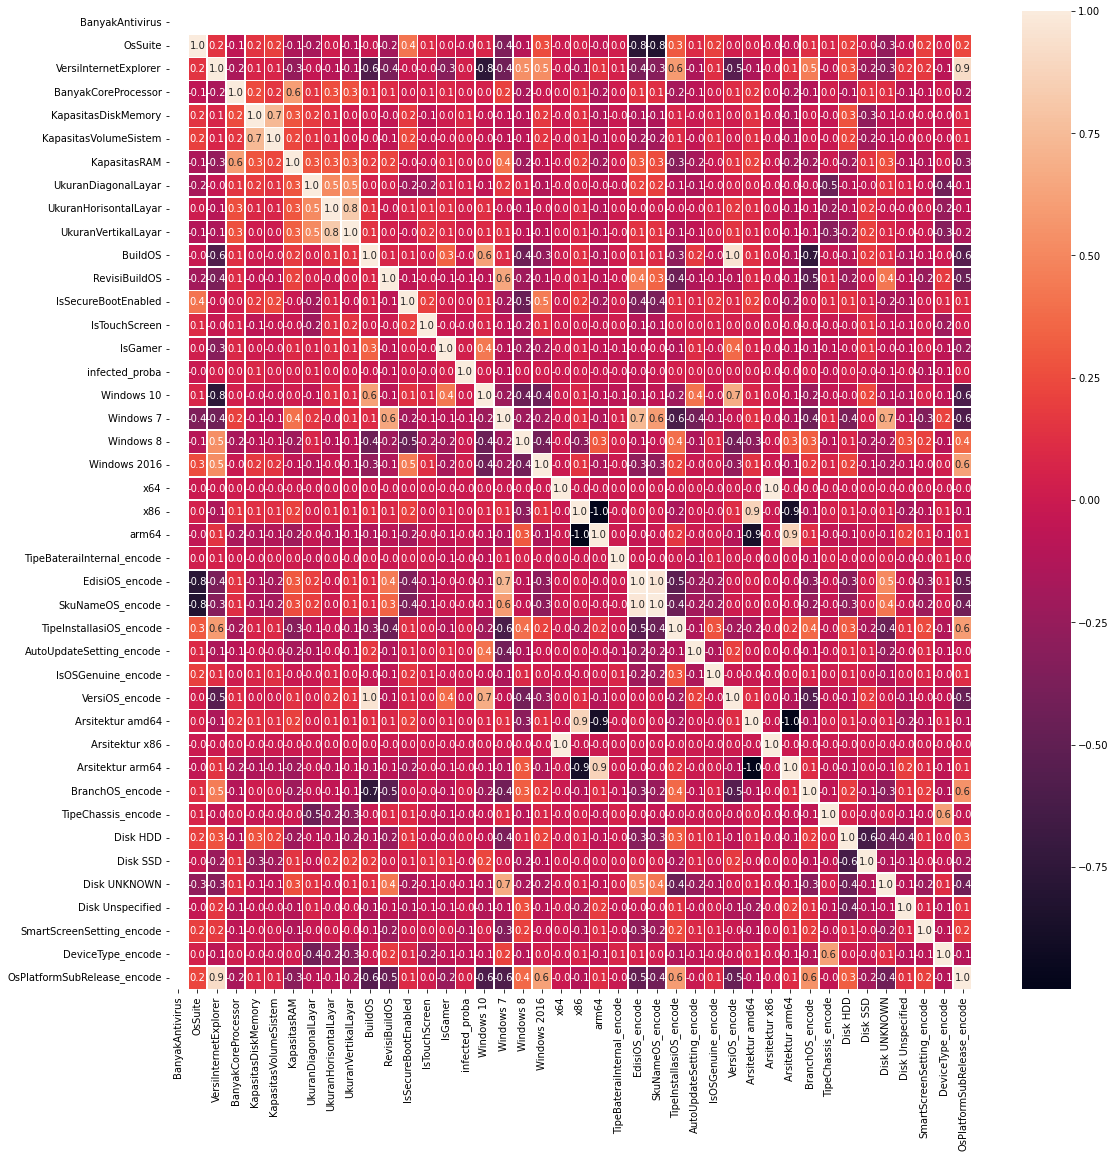

In [ ]:
# heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(car_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
X_clust4 = dv_clust[['BanyakCoreProcessor', 'KapasitasRAM']]
X_clust4

,BanyakCoreProcessor,KapasitasRAM
0,2.0,2048.0
1,4.0,6144.0
2,4.0,4096.0
3,2.0,2048.0
4,4.0,4096.0
...,...,...
149600,7.0,14336.0
149601,2.0,4096.0
149602,4.0,4096.0
149603,2.0,10240.0


For n_clusters = 2 The average silhouette_coefficient is : 0.7539259983300611
For n_clusters = 3 The average silhouette_coefficient is : 0.8201444652066455
For n_clusters = 4 The average silhouette_coefficient is : 0.8746233734595859
For n_clusters = 5 The average silhouette_coefficient is : 0.9381070720854658
For n_clusters = 6 The average silhouette_coefficient is : 0.9500427728879085


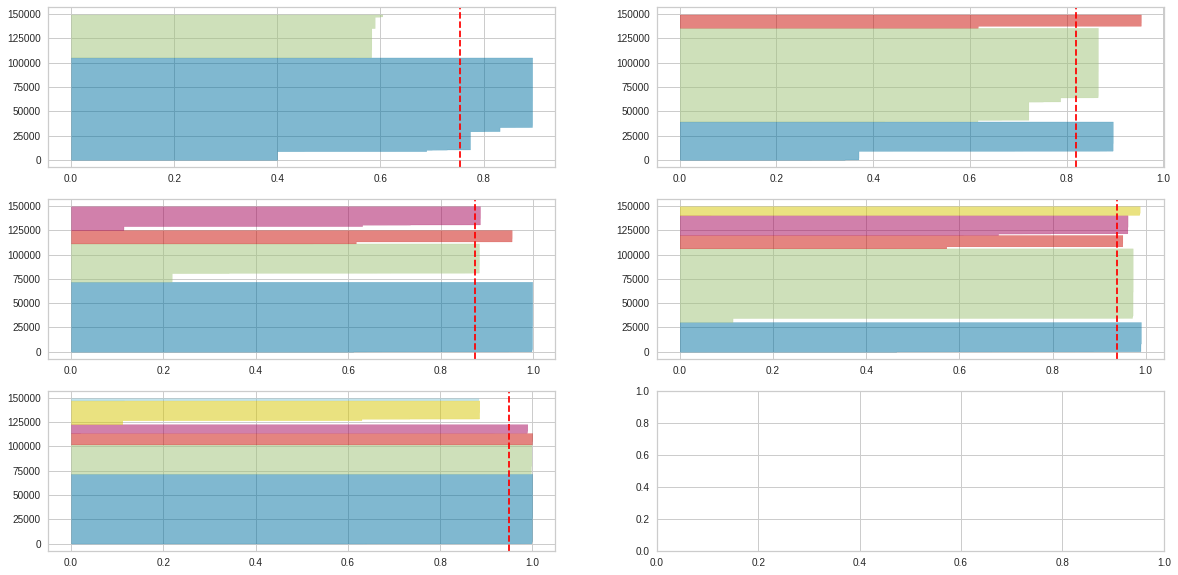

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X_clust4)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X_clust4)
    silhouette_avg = silhouette_score(X_clust4, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [ ]:
kmeans = KMeans(n_clusters=6)
cluster_assignment = kmeans.fit_predict(X_clust4)
data_with_clusters = pd.DataFrame(X_clust4.copy(), columns=('BanyakCoreProcessor', 'KapasitasRAM'))
data_with_clusters['Clusters'] = cluster_assignment 
data_with_clusters

,BanyakCoreProcessor,KapasitasRAM,Clusters
0,2.0,2048.0,3
1,4.0,6144.0,4
2,4.0,4096.0,0
3,2.0,2048.0,3
4,4.0,4096.0,0
...,...,...,...
149600,7.0,14336.0,2
149601,2.0,4096.0,0
149602,4.0,4096.0,0
149603,2.0,10240.0,5


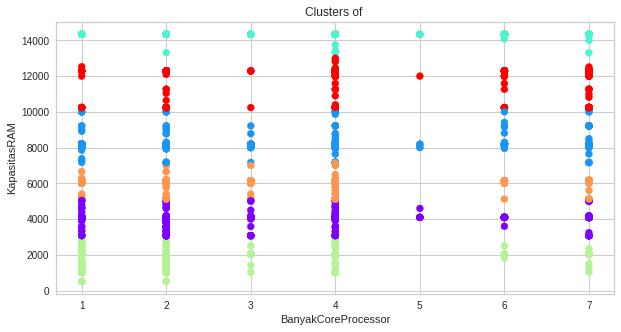

0          2048.0
1          6144.0
2          4096.0
3          2048.0
4          4096.0
           ...   
149600    14336.0
149601     4096.0
149602     4096.0
149603    10240.0
149604    14336.0
Name: KapasitasRAM, Length: 149544, dtype: float64


In [ ]:
# Create figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes()

# Prepare data
x = data_with_clusters['BanyakCoreProcessor']
y = data_with_clusters['KapasitasRAM']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of ")
ax.set_xlabel('BanyakCoreProcessor')
ax.set_ylabel('KapasitasRAM')

# Show plot
plt.show()

print(y)